# Test on Rober Problem
abstol    = 1e-9
reltol    = 1e-12
p_true    = [1, 1, 1]
y0        = [1.0, 0.0, 0.0]
tsteps_numbers = 50
tsteps    = 10 .^ range(log10(1e-1), log10(1e5), length=tsteps_numbers)
tspan     = (0.0, tsteps[end] + 1e-3)
solver    = KenCarp4()  # Alternatively, use Rosenbrock23()

prob      = ODEProblem(f, y0, tspan, p_true)
y_true    = predict_ode(y0, p_true; sample=tsteps_numbers)

noise_level = 0
rng         = MersenneTwister(Int32(floor(1e7*noise_level)))
scale       = vec(maximum(y_true, dims=2))
y_noise   = y_true + noise_level .* (rand(rng, length(y0), length(tsteps)) .- 0.5) .* scale

weights   = [1, 2e4, 1]
xscale    = :log10
n_epoch   =  50
n_exp     = tsteps_numbers
n_exp_train = 40
n_exp_valid = tsteps_numbers - n_exp_train
qssa_time_end = 1e4

p_init    = [0.5, 2, 0.9]
y1_true, y2_true, y3_true = y_true[1, :], y_true[2, :], y_true[3, :]

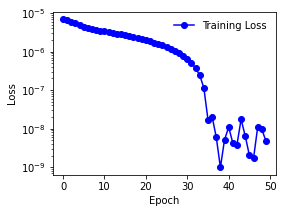

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file that contains the final losses
losses_df = pd.read_csv("figures/final_losses.csv")

# Plot the losses_y_train
plt.figure(figsize=(4, 3))

# Plotting the losses
plt.plot(losses_df['losses_y_train'], marker='o', linestyle='-', color='blue', label='Training Loss')

# Adding title and labels
plt.yscale("log")  # Optional: Log scale for x-axis

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(frameon=False)

# Display the plot
# plt.grid(True)
plt.show()

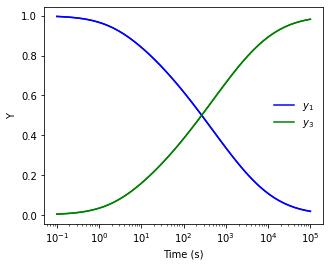

In [13]:
# Import necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# List of epochs to plot using linspace
epochs = np.linspace(0, 50, 6, dtype=int)  # Generate epochs: [0, 10, 20, 30, 40, 50]

# Weights for y1, y2, and y3
# weights = [1, 2e4, 1]  # for y1, y2, y3

weights = [1, 1, 1]  # for y1, y2, y3
# First figure: Plot for y1 and y3
plt.figure(figsize=(5, 4))

# Set the font to serif
# plt.rcParams['font.family'] = 'serif'

# Define the filename for epoch 0 (or the first epoch to plot)
filename = f"figures/train_interval_epoch_0.csv"
    
# Read the CSV file
data = pd.read_csv(filename)
y_true_1 = data['y_true_1'] * weights[0]
y_true_3 = data['y_true_3'] * weights[2]

# Plot true values for y1 and y3
plt.plot(data['t'], y_true_1, label=f"$y_1$", linestyle="-", color="blue")
plt.plot(data['t'], y_true_3, label=f"$y_3$", linestyle="-", color="green")

filename = f"figures/train_interval_epoch_0.csv"
# Read the CSV file
data = pd.read_csv(filename)
# Apply weights to the true values
y_true_1 = data['y_true_1'] * weights[0]
y_true_3 = data['y_true_3'] * weights[2]

# Plot the true values for y1 and y3
plt.plot(data['t'], y_true_1, linestyle="-", color="blue")
plt.plot(data['t'], y_true_3, linestyle="-", color="green")

# Labels and title
plt.xscale("log")  # Optional: Log scale for x-axis

plt.xlabel("Time (s)")
plt.ylabel("Y")
plt.legend(frameon=False)  # Remove the frame around the legend

plt.savefig("plots_for_y1_y2.png")

# Set x-axis to log scale
plt.xscale("log")  # Optional: Log scale for x-axis

plt.show()

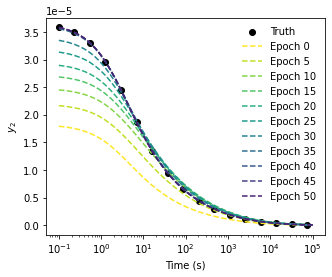

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Second figure: Plot for y2 and reconstructed y2
plt.figure(figsize=(5, 4))
epochs = np.linspace(0, 50, 11, dtype=int)  # Generate epochs: [0, 10, 20, 30, 40, 50]

# Set the font to serif
# plt.rcParams['font.family'] = 'serif'

# Define the filename for epoch 0 (or the first epoch to plot)
filename = f"figures/train_interval_epoch_0.csv"
    
# Read the CSV file
data = pd.read_csv(filename)
y_true_2 = data['y_true_2'] * weights[1] 

# Plot true values for y2 with a scatter plot, labeled as "Truth"
plt.scatter(data['t'][::3], y_true_2[::3], label="Truth", color="black", marker='o')

# Use reversed viridis colormap to choose colors for reconstructed y2
cmap = plt.get_cmap('viridis')  # Viridis colormap (not reversed here)
colors = [cmap((len(epochs)-i) / len(epochs)) for i in range(len(epochs))]  # Generate reversed colors from the colormap

# Loop through the epochs and plot the reconstructed values for each one
for i, epoch in enumerate(epochs):
    # Define the filename based on the current epoch
    filename = f"figures/train_interval_epoch_{epoch}.csv"
    # Read the CSV file
    data = pd.read_csv(filename)
    # Apply weights to the reconstructed values
    y_recon_2 = data['y_recon_2'] * weights[1]  # Only reconstructing y2

    # Plot the reconstructed y2, use the color from the viridis colormap
    # if i == 0:
    plt.plot(data['t'], y_recon_2, linestyle="--", color=colors[i], label=f"Epoch {epoch}")
    # else:
    #     # Plot subsequent reconstructed lines without labels
    #     plt.plot(data['t'], y_recon_2, linestyle="--", color=colors[i])

# Labels and title
plt.xlabel("Time (s)")
plt.ylabel(f"$y_2$")
plt.legend(frameon=False, fontsize=10)  # Remove the frame around the legend

# Set x-axis to log scale
plt.xscale("log")  # Optional: Log scale for x-axis

# Save the figure as a PDF
# plt.savefig("reconstructed_vs_truth.pdf", format="pdf")
plt.savefig("reconstructed_vs_truth.png")


# Display the plot
plt.show()